In [22]:
# Step 1: Install required libraries
!pip install pandas numpy matplotlib seaborn plotly wordcloud nltk textblob -q
!python -m textblob.download_corpora -q

print("✅ Libraries installed successfully!")

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.
✅ Libraries installed successfully!


In [23]:
# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# For text analysis
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import re
from collections import Counter

# For file upload
from google.colab import files
import io

# Download stopwords
nltk.download('stopwords', quiet=True)

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
print("📚 All libraries imported successfully!")

📚 All libraries imported successfully!


In [24]:
# Step 3: UPLOAD YOUR DATASET
print("="*70)
print("📤 STEP 1: UPLOAD YOUR GOOGLE PLAY STORE DATASET")
print("="*70)
print("Please click on 'Choose Files' button below to upload your CSV file.")
print("The file should be named something like: googleplaystore.csv, PlayStore.csv, etc.")
print("-"*70)

# Upload the file
uploaded = files.upload()

# Check if any file was uploaded
if len(uploaded) == 0:
    print("\n❌ No file was uploaded. Please run this cell again and upload your file.")
else:
    # Get the uploaded file name
    file_name = list(uploaded.keys())[0]
    print(f"\n✅ File uploaded successfully: {file_name}")
    print(f"📊 File size: {len(uploaded[file_name]) / 1024:.2f} KB")

    # Load the dataset
    df = pd.read_csv(io.BytesIO(uploaded[file_name]))

    print(f"\n📈 Dataset loaded successfully!")
    print(f"   • Rows: {df.shape[0]:,}")
    print(f"   • Columns: {df.shape[1]}")

    # Display basic information
    print("\n" + "="*70)
    print("📋 DATASET PREVIEW")
    print("="*70)
    print("\nFirst 5 rows:")
    display(df.head())

    print("\n📝 Column names:")
    for i, col in enumerate(df.columns, 1):
        print(f"   {i:2d}. {col}")

    print("\n🔍 Data types:")
    print(df.dtypes)

📤 STEP 1: UPLOAD YOUR GOOGLE PLAY STORE DATASET
Please click on 'Choose Files' button below to upload your CSV file.
The file should be named something like: googleplaystore.csv, PlayStore.csv, etc.
----------------------------------------------------------------------


Saving apps.csv to apps (1).csv
Saving user_reviews.csv to user_reviews (1).csv

✅ File uploaded successfully: apps (1).csv
📊 File size: 1184.79 KB

📈 Dataset loaded successfully!
   • Rows: 9,659
   • Columns: 14

📋 DATASET PREVIEW

First 5 rows:


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up



📝 Column names:
    1. Unnamed: 0
    2. App
    3. Category
    4. Rating
    5. Reviews
    6. Size
    7. Installs
    8. Type
    9. Price
   10. Content Rating
   11. Genres
   12. Last Updated
   13. Current Ver
   14. Android Ver

🔍 Data types:
Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [25]:
# Step 4: Data Cleaning
print("="*70)
print("🧹 STEP 2: DATA CLEANING")
print("="*70)

# Create a copy for cleaning
df_clean = df.copy()

# Display missing values before cleaning
print("\n🔍 Missing values before cleaning:")
missing_before = df_clean.isnull().sum()
print(missing_before[missing_before > 0])

# Clean Size column
def clean_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', '')) * 1
        elif 'k' in size:
            return float(size.replace('k', '')) / 1024
        elif 'G' in size:
            return float(size.replace('G', '')) * 1024
        elif size == 'Varies with device':
            return np.nan
    return np.nan

df_clean['Size_MB'] = df_clean['Size'].apply(clean_size)

# Clean Installs column
def clean_installs(installs):
    if isinstance(installs, str):
        return int(installs.replace('+', '').replace(',', ''))
    return 0

df_clean['Installs_Cleaned'] = df_clean['Installs'].apply(clean_installs)

# Clean Price column
def clean_price(price):
    if isinstance(price, str):
        price = price.replace('$', '').replace('Everyone', '0')
        try:
            return float(price)
        except:
            return 0.0
    return 0.0

df_clean['Price_Cleaned'] = df_clean['Price'].apply(clean_price)

# Clean Reviews column
df_clean['Reviews'] = pd.to_numeric(df_clean['Reviews'], errors='coerce')

# Handle missing values
df_clean['Rating'] = df_clean['Rating'].fillna(df_clean['Rating'].median())
df_clean['Size_MB'] = df_clean['Size_MB'].fillna(df_clean['Size_MB'].median())
df_clean['Type'] = df_clean['Type'].fillna('Free')

# Remove duplicates
df_clean = df_clean.drop_duplicates(subset=['App'])

print(f"\n✅ Data cleaning completed!")
print(f"   • Original dataset: {df.shape[0]:,} rows")
print(f"   • Cleaned dataset: {df_clean.shape[0]:,} rows")
print(f"   • Duplicates removed: {df.shape[0] - df_clean.shape[0]}")

print("\n🔍 Missing values after cleaning:")
missing_after = df_clean.isnull().sum()
print(missing_after[missing_after > 0])

# Display cleaned data sample
print("\n📊 Cleaned data sample:")
display(df_clean.head())

🧹 STEP 2: DATA CLEANING

🔍 Missing values before cleaning:
Rating         1463
Size           1227
Current Ver       8
Android Ver       2
dtype: int64

✅ Data cleaning completed!
   • Original dataset: 9,659 rows
   • Cleaned dataset: 9,659 rows
   • Duplicates removed: 0

🔍 Missing values after cleaning:
Size           1227
Current Ver       8
Android Ver       2
Size_MB        9659
dtype: int64

📊 Cleaned data sample:


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB,Installs_Cleaned,Price_Cleaned
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,10000,0.0
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,500000,0.0
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN,5000000,0.0
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN,50000000,0.0
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN,100000,0.0


📊 STEP 3: CATEGORY ANALYSIS


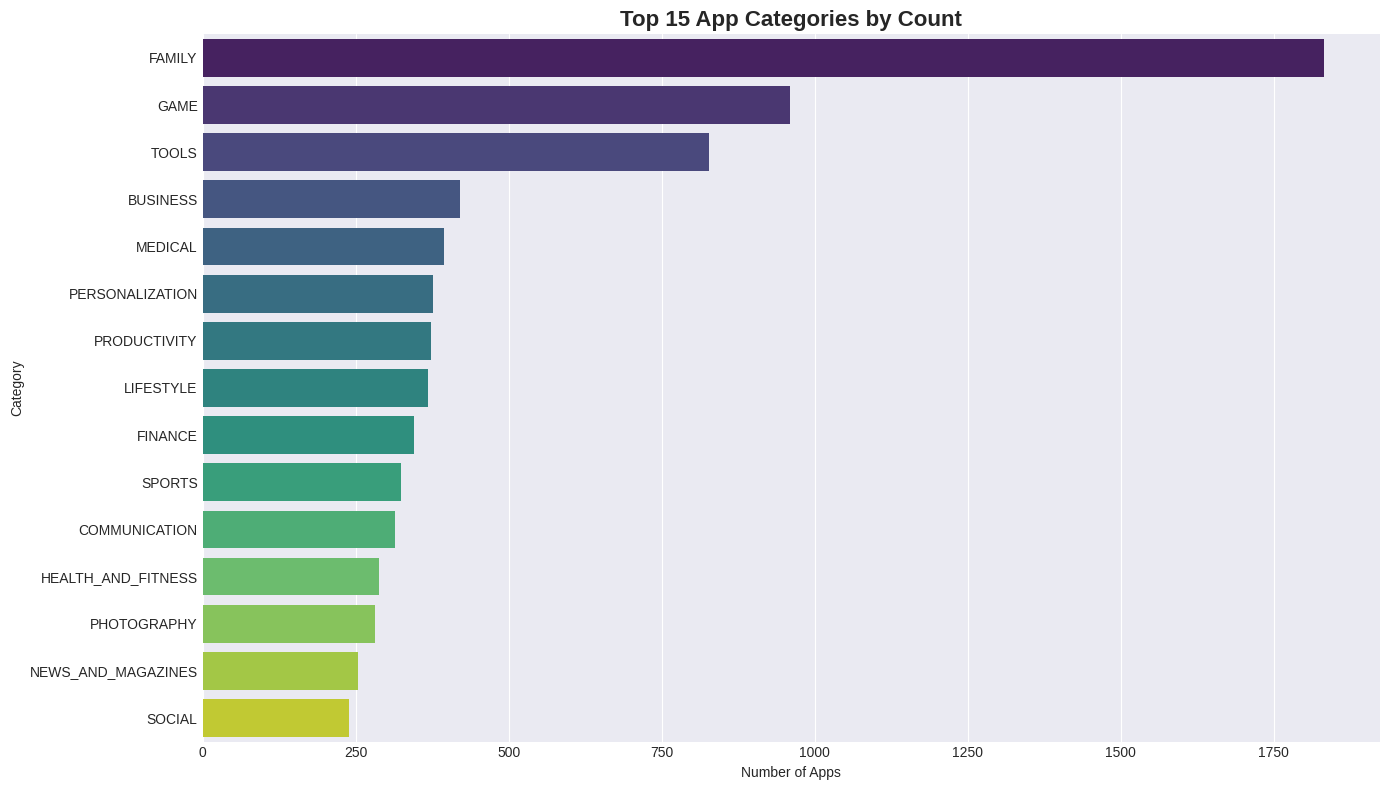


📈 Top 10 Categories by Total Installs:


,Avg_Rating,App_Count,Total_Installs,Avg_Price
Category,,,,
GAME,4.25,959,13878924415,0.30
COMMUNICATION,4.15,315,11038276251,0.26
TOOLS,4.07,827,8001771915,0.32
PRODUCTIVITY,4.21,374,5793091369,0.67
SOCIAL,4.26,239,5487867902,0.07
PHOTOGRAPHY,4.17,281,4649147655,0.42
FAMILY,4.19,1832,4427941505,1.31
VIDEO_PLAYERS,4.07,163,3926902720,0.06
TRAVEL_AND_LOCAL,4.10,219,2894887146,0.23


In [26]:
# Step 5: Category Exploration
print("="*70)
print("📊 STEP 3: CATEGORY ANALYSIS")
print("="*70)

# App distribution by category
category_dist = df_clean['Category'].value_counts()

plt.figure(figsize=(14, 8))
top_15 = category_dist.head(15)
sns.barplot(x=top_15.values, y=top_15.index, palette='viridis')
plt.title('Top 15 App Categories by Count', fontsize=16, fontweight='bold')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# Category statistics
category_stats = df_clean.groupby('Category').agg({
    'Rating': ['mean', 'count'],
    'Installs_Cleaned': 'sum',
    'Price_Cleaned': 'mean'
}).round(2)

category_stats.columns = ['Avg_Rating', 'App_Count', 'Total_Installs', 'Avg_Price']
category_stats = category_stats.sort_values('Total_Installs', ascending=False)

print("\n📈 Top 10 Categories by Total Installs:")
display(category_stats.head(10))

# Interactive pie chart
fig = px.pie(values=category_dist.head(10).values,
             names=category_dist.head(10).index,
             title='Top 10 Categories Distribution',
             hole=0.3)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

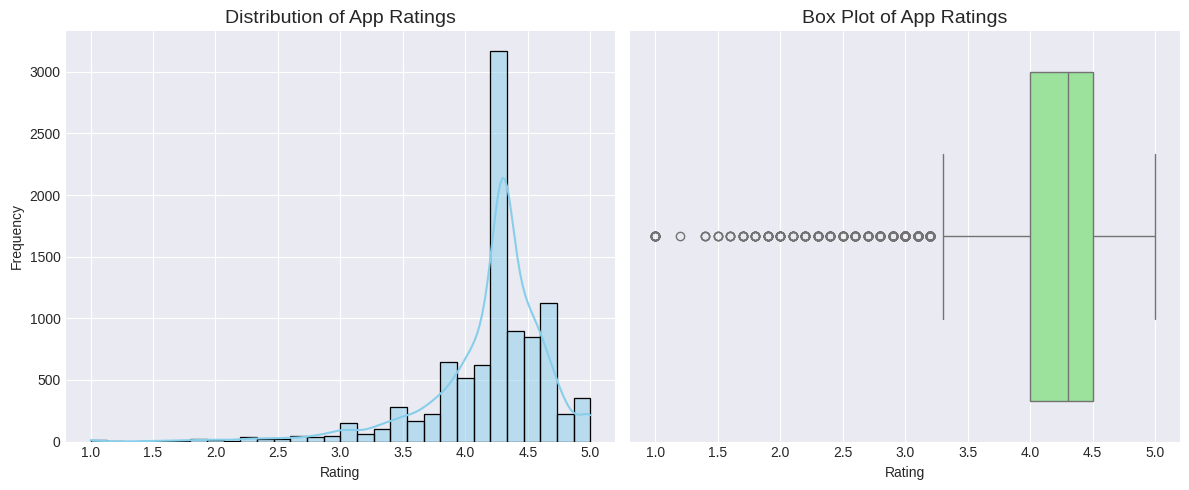

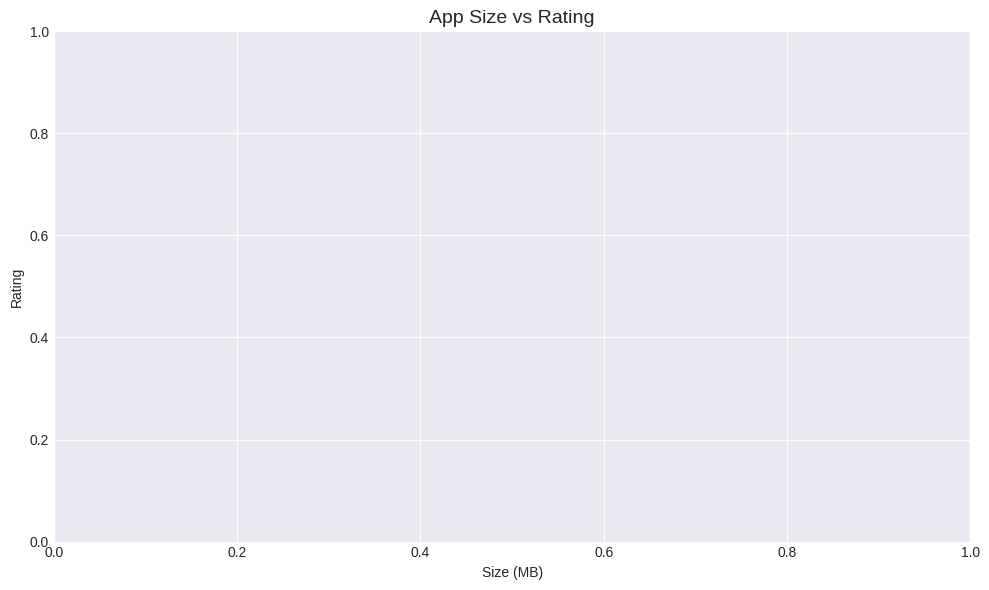

💰 Free vs Paid App Statistics:


,Rating,Installs_Cleaned,App
Type,,,
Free,4.19,8431491.93,8903
Paid,4.27,75879.47,756


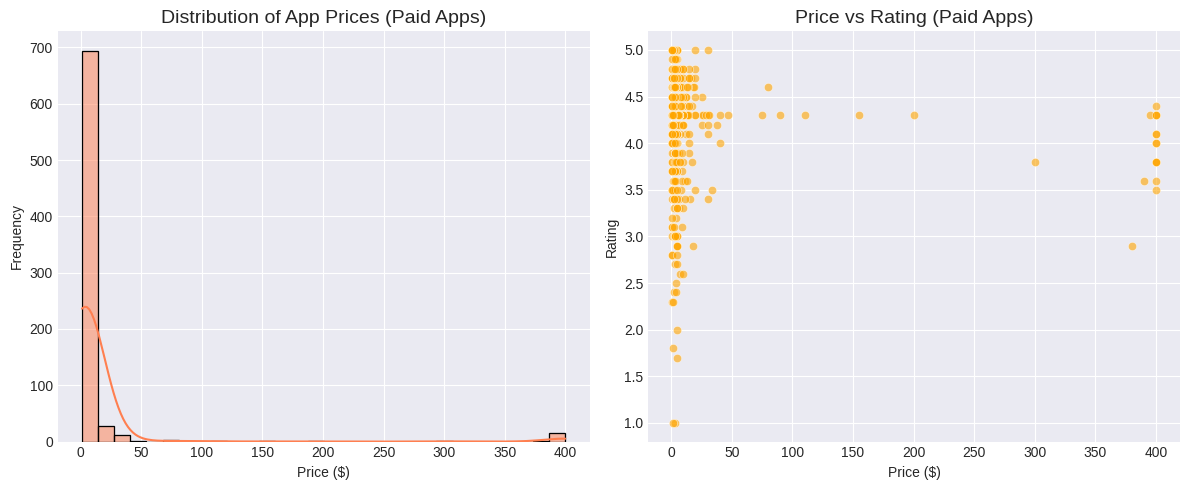

In [27]:
# Step 6.1: Rating Distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['Rating'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of App Ratings', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['Rating'], color='lightgreen')
plt.title('Box Plot of App Ratings', fontsize=14)
plt.xlabel('Rating')

plt.tight_layout()
plt.show()

# Step 6.2: Size vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size_MB', y='Rating', data=df_clean, alpha=0.5, color='purple')
plt.title('App Size vs Rating', fontsize=14)
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

# Step 6.3: Free vs Paid Apps Analysis
free_paid_stats = df_clean.groupby('Type').agg({
    'Rating': 'mean',
    'Installs_Cleaned': 'mean',
    'App': 'count'
}).round(2)

print("💰 Free vs Paid App Statistics:")
display(free_paid_stats)

# Step 6.4: Price Distribution for Paid Apps
paid_apps = df_clean[df_clean['Type'] == 'Paid']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(paid_apps['Price_Cleaned'], bins=30, kde=True, color='coral')
plt.title('Distribution of App Prices (Paid Apps)', fontsize=14)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Price_Cleaned', y='Rating', data=paid_apps, alpha=0.6, color='orange')
plt.title('Price vs Rating (Paid Apps)', fontsize=14)
plt.xlabel('Price ($)')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()

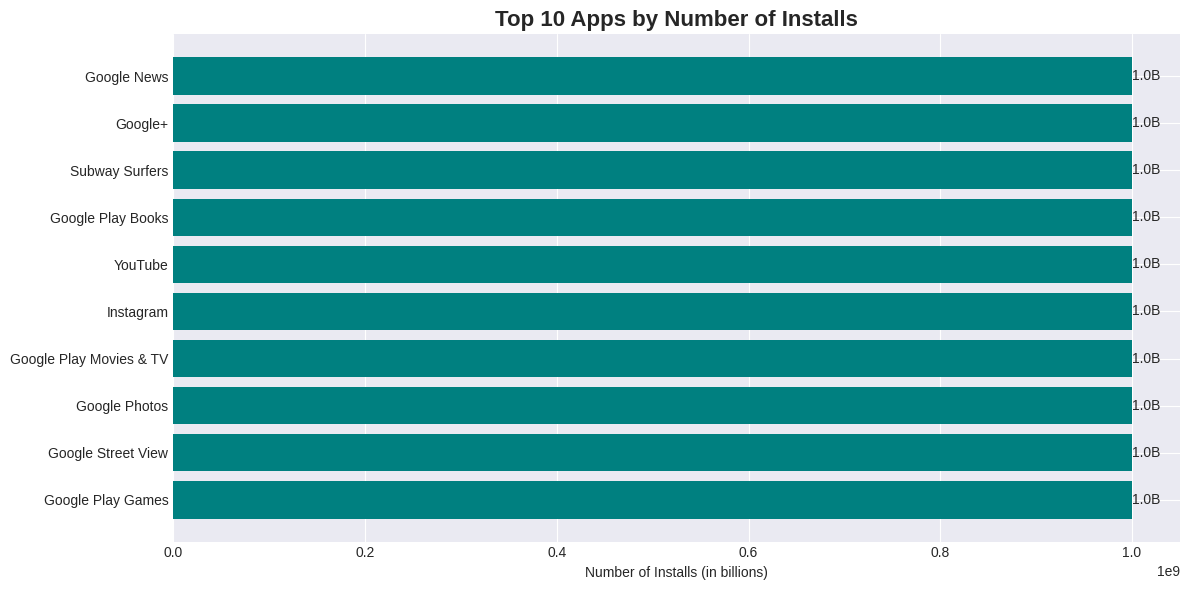

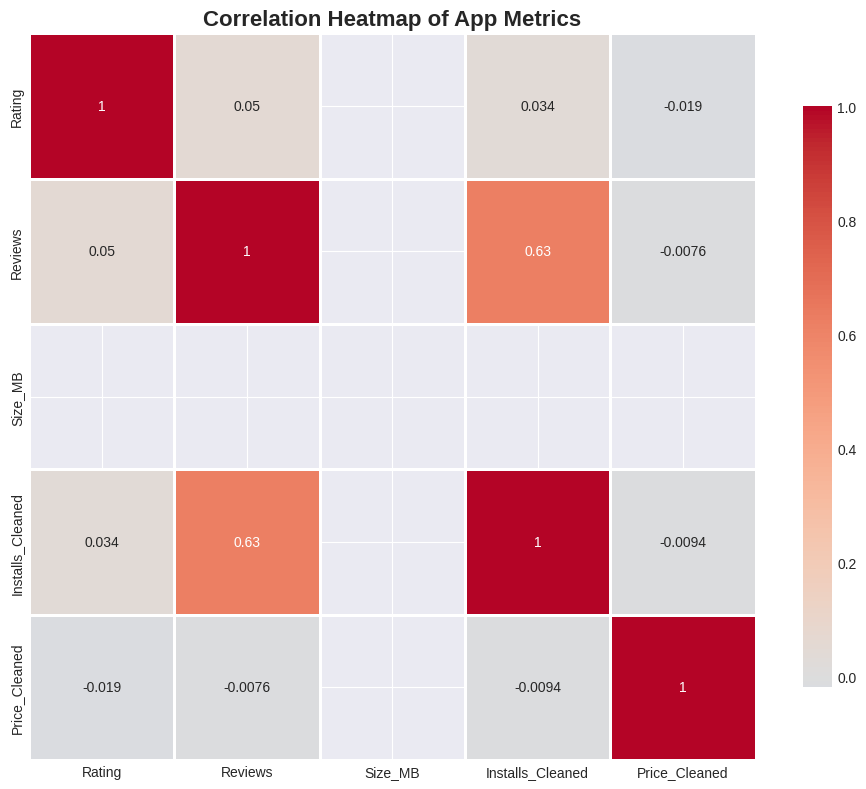

In [28]:
# Step 7.1: Top Apps by Installs
top_apps = df_clean.sort_values('Installs_Cleaned', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bars = plt.barh(top_apps['App'], top_apps['Installs_Cleaned'], color='teal')
plt.gca().invert_yaxis()
plt.title('Top 10 Apps by Number of Installs', fontsize=16, fontweight='bold')
plt.xlabel('Number of Installs (in billions)')
plt.tight_layout()

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width/1e9:.1f}B', ha='left', va='center')
plt.show()

# Step 7.2: Correlation Heatmap
numeric_cols = ['Rating', 'Reviews', 'Size_MB', 'Installs_Cleaned', 'Price_Cleaned']
correlation_matrix = df_clean[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of App Metrics', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [30]:
# Step 8: Interactive Visualizations
print("="*70)
print("📊 STEP 6: INTERACTIVE VISUALIZATIONS")
print("="*70)

# Step 8.1: Interactive Scatter Plot
fig = px.scatter(df_clean,
                 x='Reviews',
                 y='Rating',
                 size='Installs_Cleaned',
                 color='Type',
                 hover_data=['App', 'Category', 'Price'],
                 title='Interactive: Reviews vs Rating (Size = Installs)',
                 log_x=True,
                 opacity=0.7)
fig.update_layout(height=500)
fig.show()

# Step 8.2: Interactive Category Analysis
category_summary = df_clean.groupby('Category').agg({
    'Rating': 'mean',
    'Installs_Cleaned': 'sum',
    'App': 'count'
}).reset_index()

fig = px.scatter(category_summary,
                 x='App',
                 y='Rating',
                 size='Installs_Cleaned',
                 color='Installs_Cleaned',
                 hover_name='Category',
                 title='Category Analysis: Count vs Average Rating',
                 labels={'App': 'Number of Apps', 'Rating': 'Average Rating'},
                 size_max=60)
fig.show()

# Step 8.3: Time Series Analysis (Fixed)
# First, let's check the 'Last Updated' column format
print("\n🔍 Checking 'Last Updated' column format:")
print(f"Data type: {df_clean['Last Updated'].dtype}")
print(f"Sample values: {df_clean['Last Updated'].head(3).tolist()}")

# Clean and convert to datetime
def clean_date(date_str):
    if pd.isna(date_str):
        return pd.NaT
    try:
        # Handle common date formats
        date_str = str(date_str).strip()
        # Try different date formats
        for fmt in ['%B %d, %Y', '%b %d, %Y', '%Y-%m-%d', '%d-%m-%Y', '%m/%d/%Y']:
            try:
                return pd.to_datetime(date_str, format=fmt)
            except:
                continue
        # If none of the formats work, use pandas default parser
        return pd.to_datetime(date_str, errors='coerce')
    except:
        return pd.NaT

df_clean['Last Updated Cleaned'] = df_clean['Last Updated'].apply(clean_date)

# Check if conversion was successful
print(f"\n✅ Date conversion complete!")
print(f"Missing dates after conversion: {df_clean['Last Updated Cleaned'].isna().sum()}")
print(f"Date range: {df_clean['Last Updated Cleaned'].min()} to {df_clean['Last Updated Cleaned'].max()}")

# Extract year from cleaned dates
df_clean['Year'] = df_clean['Last Updated Cleaned'].dt.year

# Group by year
yearly_stats = df_clean.groupby('Year').agg({
    'App': 'count',
    'Rating': 'mean',
    'Installs_Cleaned': 'sum'
}).reset_index().dropna()

print("\n📅 Yearly Statistics:")
display(yearly_stats)

# Create time series visualization
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Bar(x=yearly_stats['Year'], y=yearly_stats['App'],
           name="Number of Apps", marker_color='blue', opacity=0.7),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=yearly_stats['Year'], y=yearly_stats['Rating'],
               name="Average Rating", mode='lines+markers',
               marker_color='red', line=dict(width=3)),
    secondary_y=True,
)
fig.update_layout(
    title_text="App Updates and Ratings Over Time",
    height=500,
    showlegend=True,
    template='plotly_white'
)
fig.update_xaxes(title_text="Year", tickmode='linear')
fig.update_yaxes(title_text="Number of Apps", secondary_y=False)
fig.update_yaxes(title_text="Average Rating", secondary_y=True, range=[3.5, 4.5])
fig.show()

# Step 8.4: Additional interactive plot - Price distribution by category
fig = px.box(df_clean[df_clean['Price_Cleaned'] > 0],
             x='Category',
             y='Price_Cleaned',
             title='Price Distribution of Paid Apps by Category',
             points='outliers')
fig.update_layout(
    height=600,
    xaxis_tickangle=-45,
    showlegend=False
)
fig.update_yaxes(title="Price ($)")
fig.show()

📊 STEP 6: INTERACTIVE VISUALIZATIONS



🔍 Checking 'Last Updated' column format:
Data type: object
Sample values: ['January 7, 2018', 'January 15, 2018', 'August 1, 2018']

✅ Date conversion complete!
Missing dates after conversion: 0
Date range: 2010-05-21 00:00:00 to 2018-08-08 00:00:00

📅 Yearly Statistics:


,Year,App,Rating,Installs_Cleaned
0,2010,1,4.200000,100000
1,2011,15,3.966667,17407100
2,2012,26,3.884615,13992210
3,2013,108,4.103704,103086365
4,2014,203,4.059606,269785226
5,2015,449,4.101559,405339475
6,2016,779,4.088703,1292365793
7,2017,1794,4.131438,2893100739
8,2018,6284,4.236840,70127760619


🎯 STEP 7: CONTENT RATING ANALYSIS


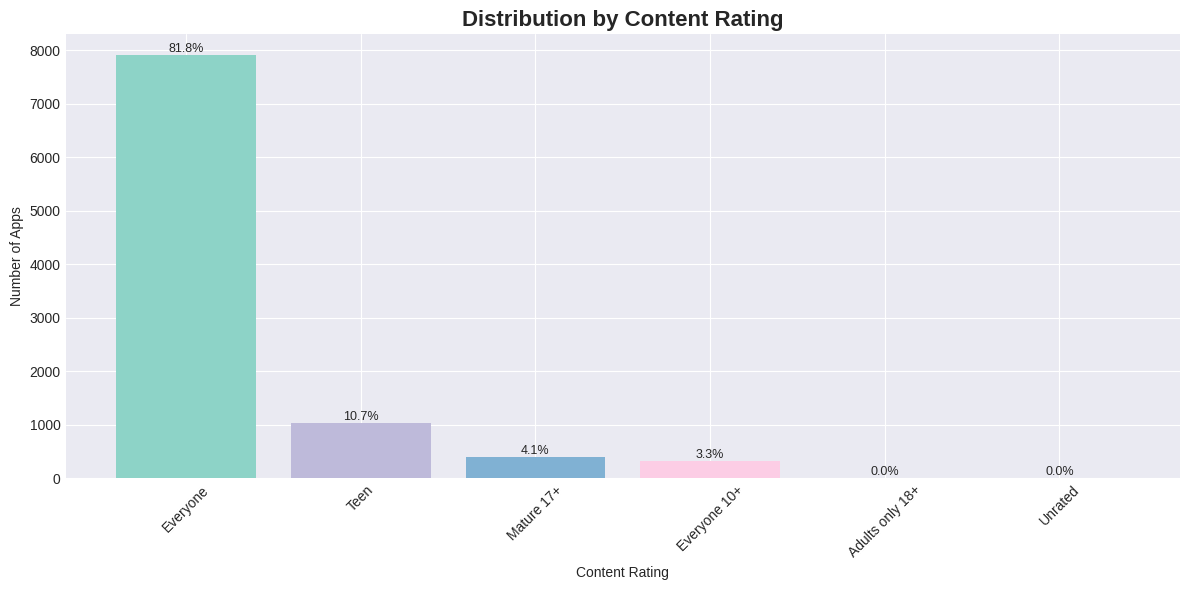

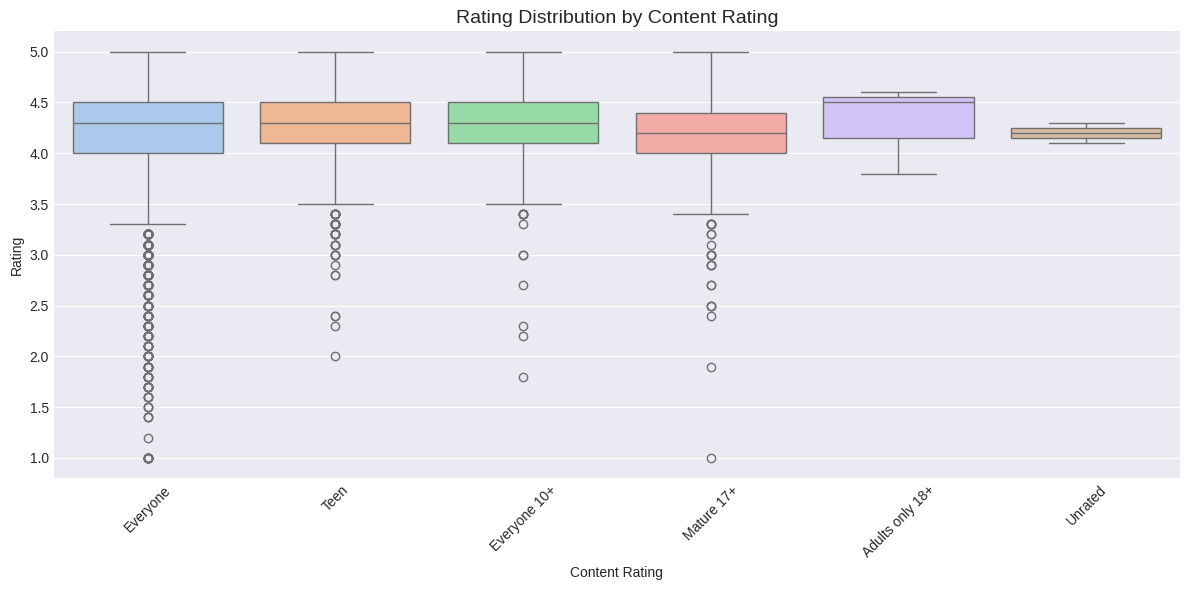


📊 Content Rating Statistics:


,Rating,Installs_Cleaned,App,Price_Cleaned
Content Rating,,,,
Everyone,4.19,52179352961,7903,1.23
Teen,4.23,16487275393,1036,0.63
Everyone 10+,4.23,4016271795,322,0.43
Mature 17+,4.14,2437986878,393,0.26
Adults only 18+,4.30,2000000,3,0.00
Unrated,4.20,50500,2,0.00


In [31]:
# Step 9: Content Rating Analysis
print("="*70)
print("🎯 STEP 7: CONTENT RATING ANALYSIS")
print("="*70)

# Clean Content Rating column
df_clean['Content Rating'] = df_clean['Content Rating'].fillna('Unrated')

# Step 9.1: Content Rating Distribution
content_rating_dist = df_clean['Content Rating'].value_counts()

plt.figure(figsize=(12, 6))
colors = plt.cm.Set3(np.linspace(0, 1, len(content_rating_dist)))
bars = plt.bar(content_rating_dist.index, content_rating_dist.values, color=colors)
plt.title('Distribution by Content Rating', fontsize=16, fontweight='bold')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)

# Add percentage labels
total = sum(content_rating_dist.values)
for bar, value in zip(bars, content_rating_dist.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{value/total*100:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Step 9.2: Content Rating vs Ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='Content Rating', y='Rating', data=df_clean, palette='pastel')
plt.title('Rating Distribution by Content Rating', fontsize=14)
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 9.3: Interactive content rating analysis
content_rating_stats = df_clean.groupby('Content Rating').agg({
    'Rating': 'mean',
    'Installs_Cleaned': 'sum',
    'App': 'count',
    'Price_Cleaned': 'mean'
}).round(2).sort_values('Installs_Cleaned', ascending=False)

print("\n📊 Content Rating Statistics:")
display(content_rating_stats)

# Interactive bar chart
fig = px.bar(content_rating_stats.reset_index(),
             x='Content Rating',
             y='Installs_Cleaned',
             color='Rating',
             title='Total Installs by Content Rating',
             text='Installs_Cleaned',
             height=500)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

🎯 STEP 7: CONTENT RATING ANALYSIS


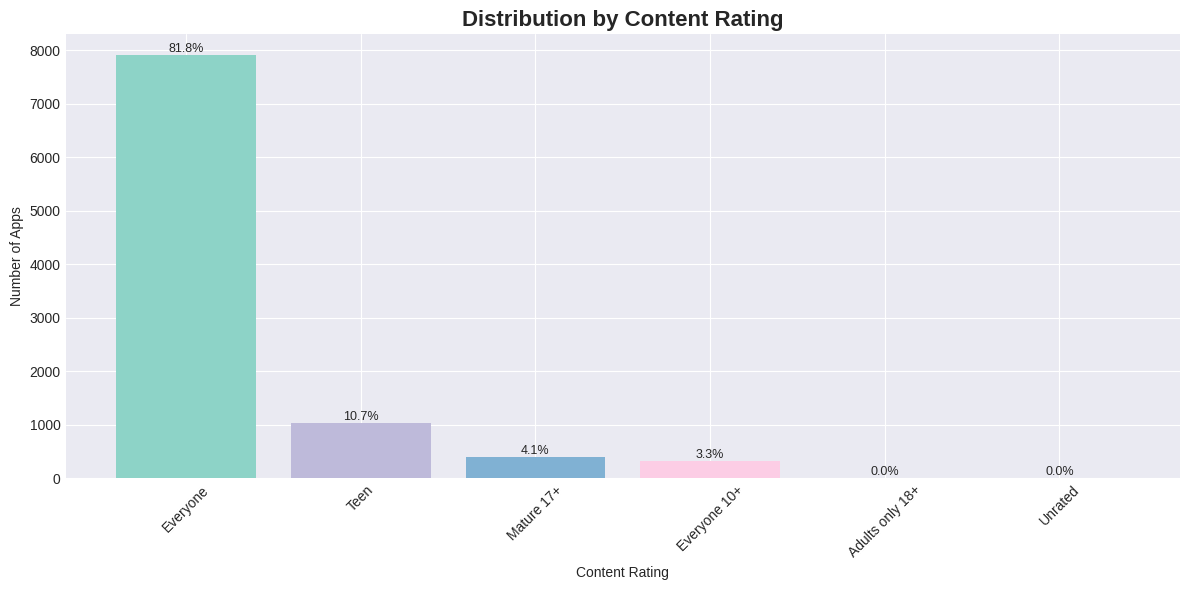

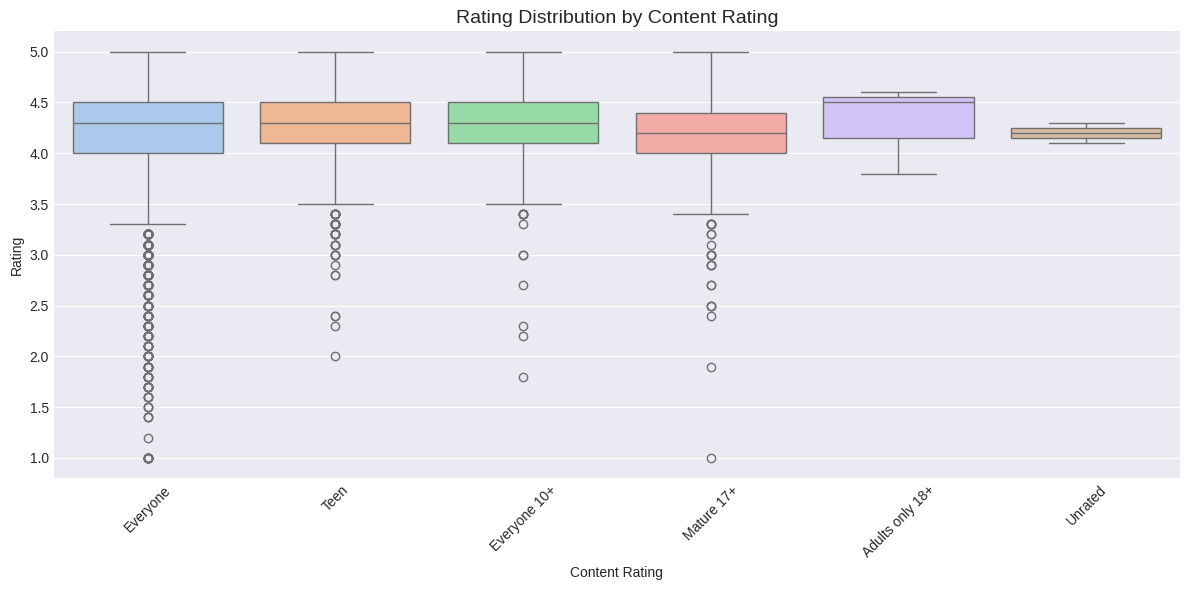


📊 Content Rating Statistics:


,Rating,Installs_Cleaned,App,Price_Cleaned
Content Rating,,,,
Everyone,4.19,52179352961,7903,1.23
Teen,4.23,16487275393,1036,0.63
Everyone 10+,4.23,4016271795,322,0.43
Mature 17+,4.14,2437986878,393,0.26
Adults only 18+,4.30,2000000,3,0.00
Unrated,4.20,50500,2,0.00


In [32]:
# Step 9: Content Rating Analysis
print("="*70)
print("🎯 STEP 7: CONTENT RATING ANALYSIS")
print("="*70)

# Clean Content Rating column
df_clean['Content Rating'] = df_clean['Content Rating'].fillna('Unrated')

# Step 9.1: Content Rating Distribution
content_rating_dist = df_clean['Content Rating'].value_counts()

plt.figure(figsize=(12, 6))
colors = plt.cm.Set3(np.linspace(0, 1, len(content_rating_dist)))
bars = plt.bar(content_rating_dist.index, content_rating_dist.values, color=colors)
plt.title('Distribution by Content Rating', fontsize=16, fontweight='bold')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)

# Add percentage labels
total = sum(content_rating_dist.values)
for bar, value in zip(bars, content_rating_dist.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{value/total*100:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Step 9.2: Content Rating vs Ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='Content Rating', y='Rating', data=df_clean, palette='pastel')
plt.title('Rating Distribution by Content Rating', fontsize=14)
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 9.3: Interactive content rating analysis
content_rating_stats = df_clean.groupby('Content Rating').agg({
    'Rating': 'mean',
    'Installs_Cleaned': 'sum',
    'App': 'count',
    'Price_Cleaned': 'mean'
}).round(2).sort_values('Installs_Cleaned', ascending=False)

print("\n📊 Content Rating Statistics:")
display(content_rating_stats)

# Interactive bar chart
fig = px.bar(content_rating_stats.reset_index(),
             x='Content Rating',
             y='Installs_Cleaned',
             color='Rating',
             title='Total Installs by Content Rating',
             text='Installs_Cleaned',
             height=500)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

🏆 STEP 8: TOP PERFORMERS ANALYSIS


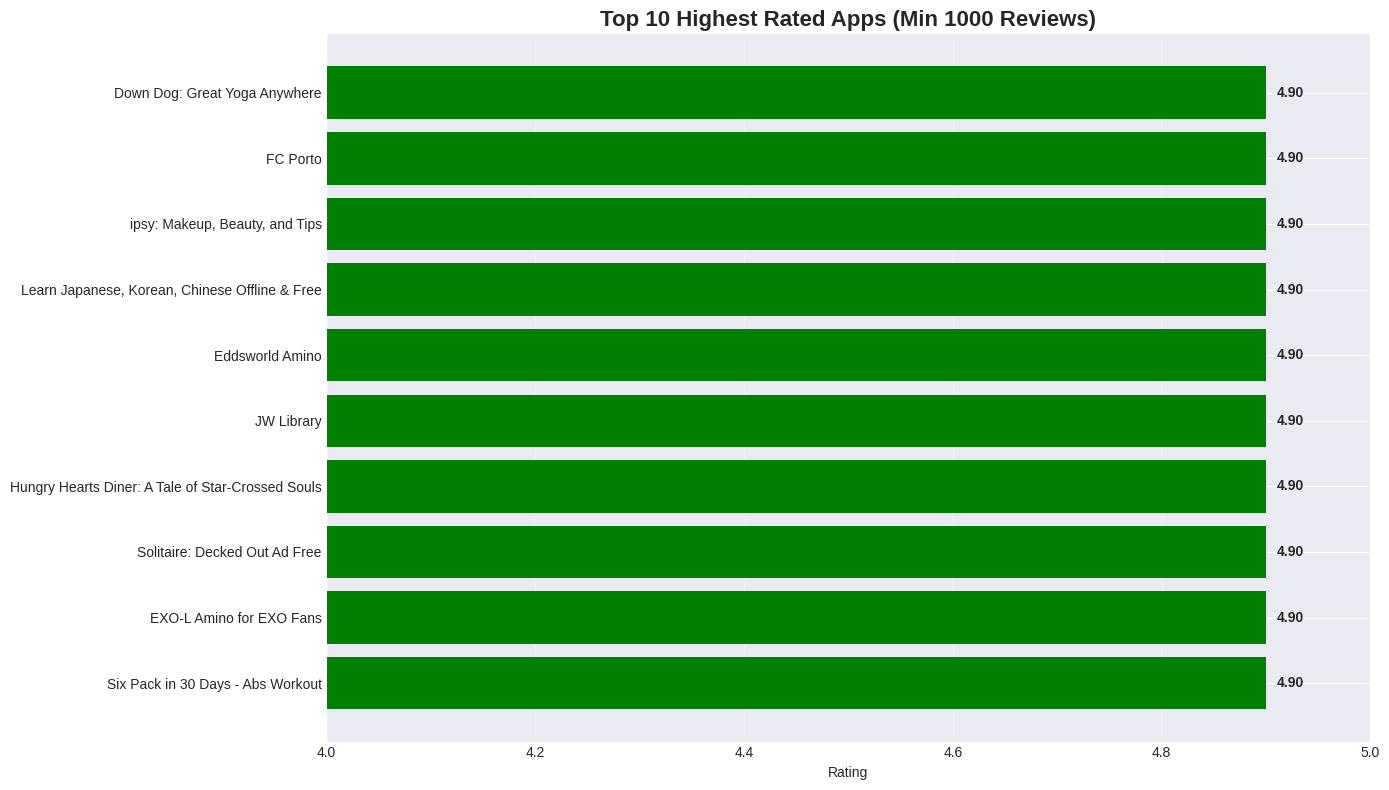


🎯 Top 10 Most Popular Free Apps:


,App,Category,Rating,Installs_Cleaned,Reviews
2191,Google Photos,PHOTOGRAPHY,4.5,1000000000,10858556
2002,Facebook,SOCIAL,4.1,1000000000,78158306
2977,Google News,NEWS_AND_MAGAZINES,3.9,1000000000,877635
701,Google Play Games,ENTERTAINMENT,4.3,1000000000,7165362
2003,Instagram,SOCIAL,4.5,1000000000,66577313
2012,Google+,SOCIAL,4.2,1000000000,4831125
2908,YouTube,VIDEO_PLAYERS,4.3,1000000000,25655305
2930,Google Play Movies & TV,VIDEO_PLAYERS,3.7,1000000000,906384
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1000000000,1433233
349,Skype - free IM & video calls,COMMUNICATION,4.1,1000000000,10484169



💰 Top 10 Best Value Paid Apps (< $10):


,App,Category,Rating,Price_Cleaned,Installs_Cleaned,Reviews
1490,The Room: Old Sins,GAME,4.9,4.99,100000,21119
3320,H*nest Meditation,LIFESTYLE,4.9,1.99,5000,145
234,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,4.99,100000,10295
1107,Relax Melodies P: Sleep Sounds,HEALTH_AND_FITNESS,4.8,2.99,100000,19543
2901,Weather Live Pro,WEATHER,4.8,4.49,100000,17493
3650,Day R Premium,FAMILY,4.8,4.99,100000,51068
5649,QR Code Pro,PRODUCTIVITY,4.8,4.49,100000,5865
7103,The House of Da Vinci,FAMILY,4.8,4.99,100000,12400
9356,Kernel Manager for Franco Kernel ✨,TOOLS,4.8,3.49,100000,12700
1749,Journal Club: Medicine,MEDICAL,4.8,6.99,10000,216


In [33]:
# Step 10: Top Performers Analysis
print("="*70)
print("🏆 STEP 8: TOP PERFORMERS ANALYSIS")
print("="*70)

# Step 10.1: Top Rated Apps (with minimum 1000 reviews)
top_rated = df_clean[df_clean['Reviews'] > 1000].sort_values('Rating', ascending=False).head(10)

plt.figure(figsize=(14, 8))
bars = plt.barh(top_rated['App'], top_rated['Rating'], color='green')
plt.gca().invert_yaxis()
plt.title('Top 10 Highest Rated Apps (Min 1000 Reviews)', fontsize=16, fontweight='bold')
plt.xlabel('Rating')
plt.xlim(4, 5)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', ha='left', va='center', fontweight='bold')
plt.tight_layout()
plt.show()

# Step 10.2: Most Popular Free Apps
top_free = df_clean[(df_clean['Type'] == 'Free') &
                    (df_clean['Installs_Cleaned'] > 0)].sort_values('Installs_Cleaned', ascending=False).head(10)

print("\n🎯 Top 10 Most Popular Free Apps:")
display(top_free[['App', 'Category', 'Rating', 'Installs_Cleaned', 'Reviews']])

# Step 10.3: Best Value (High Rating, Low Price)
best_value = df_clean[(df_clean['Price_Cleaned'] > 0) &
                      (df_clean['Price_Cleaned'] < 10) &
                      (df_clean['Reviews'] > 100)].sort_values(['Rating', 'Installs_Cleaned'],
                                                                ascending=[False, False]).head(10)

print("\n💰 Top 10 Best Value Paid Apps (< $10):")
display(best_value[['App', 'Category', 'Rating', 'Price_Cleaned', 'Installs_Cleaned', 'Reviews']])

# Step 10.4: Visualization of top apps
fig = px.scatter(top_rated.head(20),
                 x='Reviews',
                 y='Rating',
                 size='Installs_Cleaned',
                 color='Category',
                 hover_name='App',
                 title='Top Rated Apps Analysis',
                 log_x=True,
                 size_max=50)
fig.update_layout(height=500)
fig.show()

📈 STEP 9: ADVANCED ANALYSIS

🔍 Checking Size_MB column for issues:
Total rows: 9659
Size_MB - NaN values: 9659
Size_MB - Infinite values: 0
Size_MB - Min value: nan
Size_MB - Max value: nan
Size_MB - Mean value: nan

✅ Size_MB column cleaned:
Size_MB_Cleaned - NaN values: 9659
Size_MB_Cleaned - Min value: nan
Size_MB_Cleaned - Max value: nan


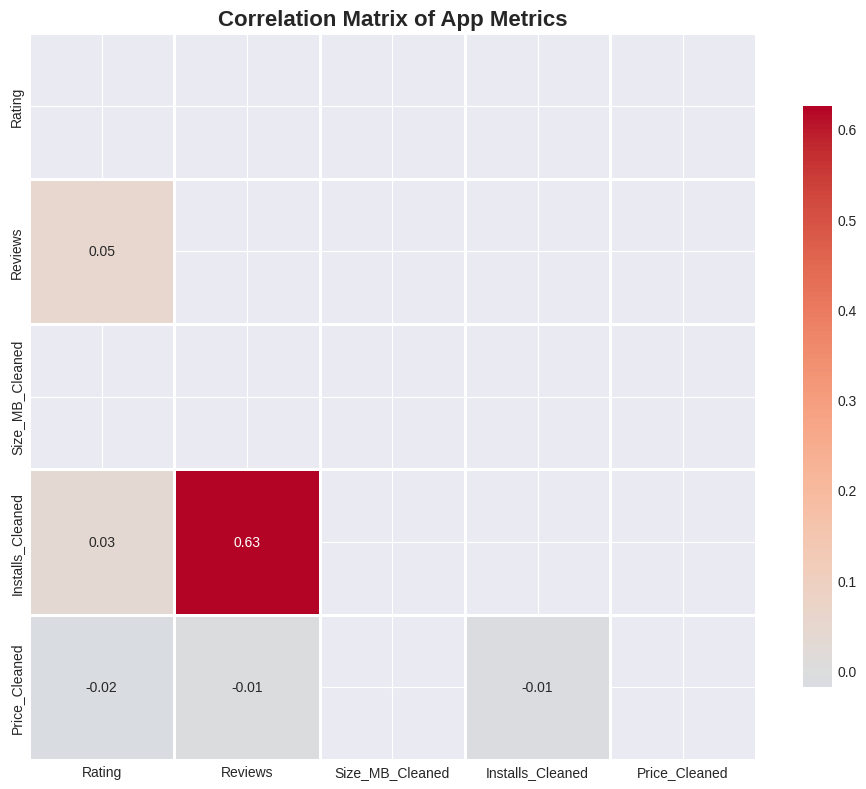


📊 Correlation Summary:
Positive correlation (> 0.3):
  • Reviews vs Installs_Cleaned: 0.625

Negative correlation (< -0.1):


⚠️ Error in creating size bins: index -1 is out of bounds for axis 0 with size 0
❌ Could not create size rating analysis chart


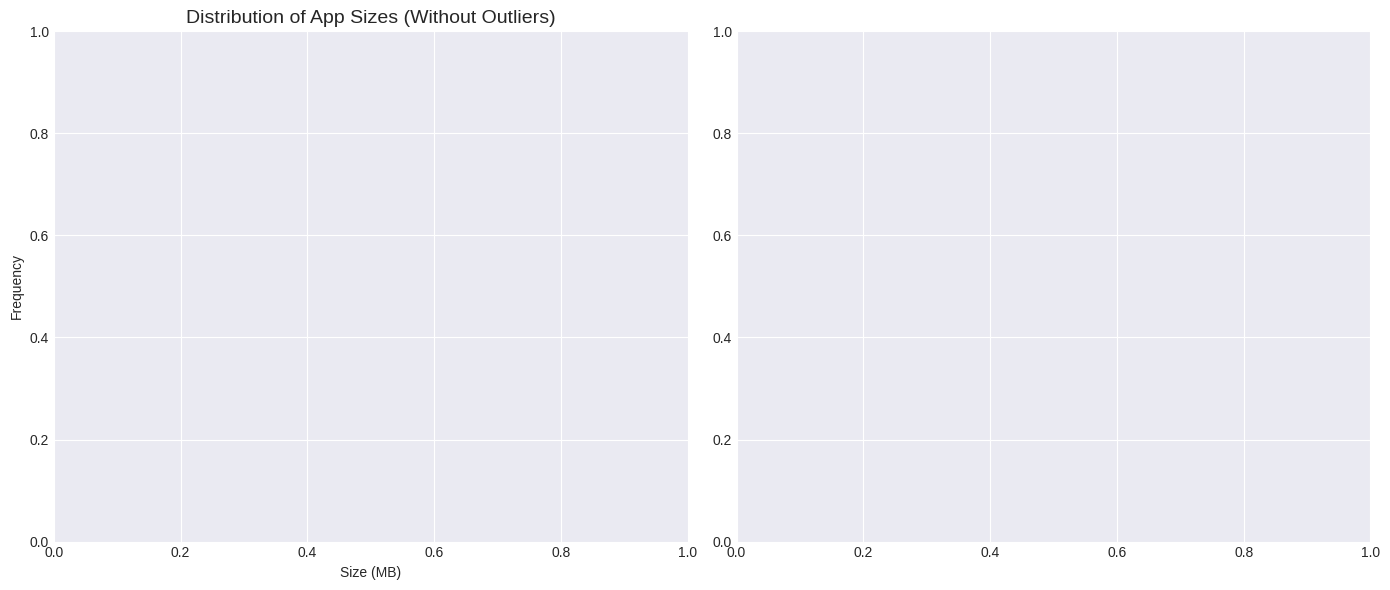


📊 ADDITIONAL ANALYSIS: REVIEWS VS INSTALLS


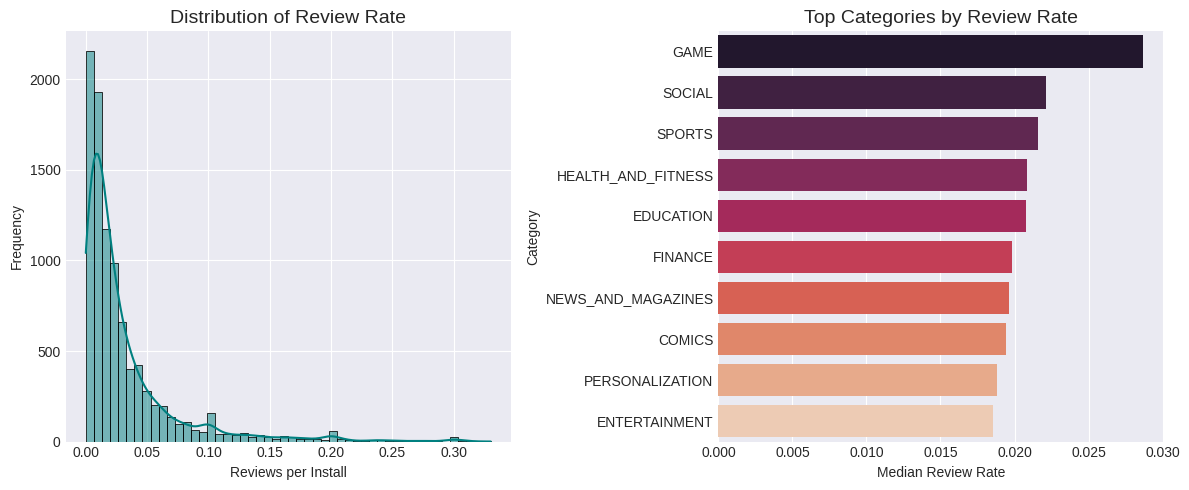


📝 Review Rate Analysis:
• Average Review Rate: 0.0381
• Median Review Rate: 0.0170

• Categories with Highest Review Rates:
  1. GAME: 0.0286
  2. SOCIAL: 0.0221
  3. SPORTS: 0.0216
  4. HEALTH_AND_FITNESS: 0.0209
  5. EDUCATION: 0.0208

💰 FREE VS PAID APPS COMPARISON

Comparison between Free and Paid Apps:


,Avg_Rating,Avg_Reviews,Avg_Installs,Avg_Size_MB,Count
Type,,,,,
Free,4.19,234243.69,8431491.93,NaN,8903
Paid,4.27,8724.89,75879.47,NaN,756


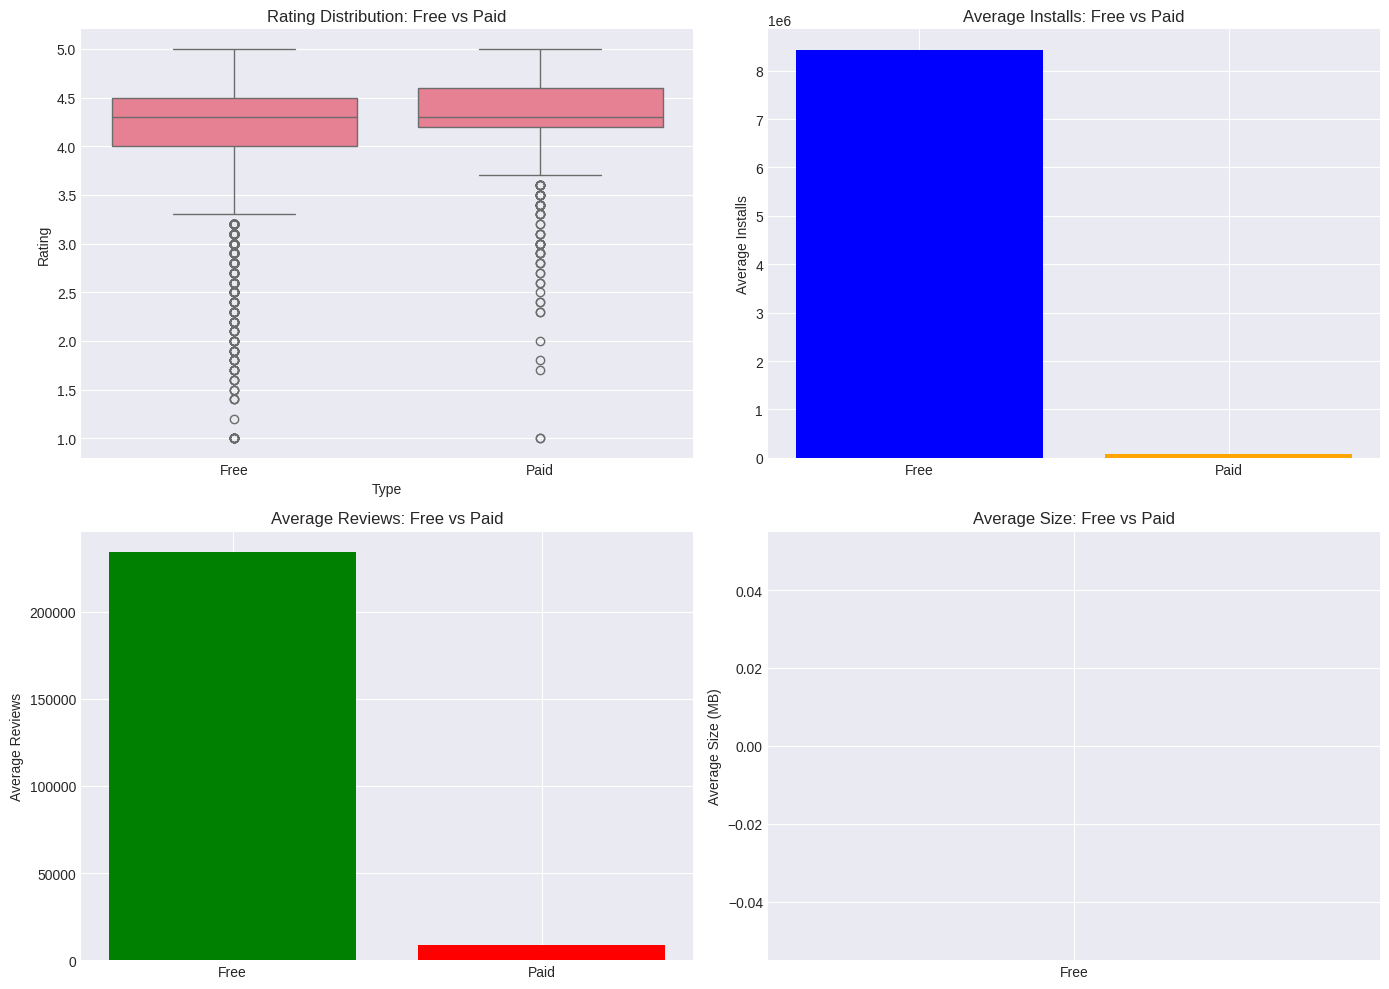


✅ Advanced analysis completed successfully!


In [35]:
# Step 11: Advanced Analysis
print("="*70)
print("📈 STEP 9: ADVANCED ANALYSIS")
print("="*70)

# Check for NaN values in Size_MB
print("\n🔍 Checking Size_MB column for issues:")
print(f"Total rows: {len(df_clean)}")
print(f"Size_MB - NaN values: {df_clean['Size_MB'].isna().sum()}")
print(f"Size_MB - Infinite values: {np.isinf(df_clean['Size_MB']).sum()}")
print(f"Size_MB - Min value: {df_clean['Size_MB'].min():.2f}")
print(f"Size_MB - Max value: {df_clean['Size_MB'].max():.2f}")
print(f"Size_MB - Mean value: {df_clean['Size_MB'].mean():.2f}")

# Handle NaN and infinite values
df_clean['Size_MB_Cleaned'] = df_clean['Size_MB'].replace([np.inf, -np.inf], np.nan)

# Fill NaN values with median (excluding infinite values)
size_median = df_clean['Size_MB_Cleaned'].median()
df_clean['Size_MB_Cleaned'] = df_clean['Size_MB_Cleaned'].fillna(size_median)

print(f"\n✅ Size_MB column cleaned:")
print(f"Size_MB_Cleaned - NaN values: {df_clean['Size_MB_Cleaned'].isna().sum()}")
print(f"Size_MB_Cleaned - Min value: {df_clean['Size_MB_Cleaned'].min():.2f}")
print(f"Size_MB_Cleaned - Max value: {df_clean['Size_MB_Cleaned'].max():.2f}")

# Correlation Analysis
numeric_cols = ['Rating', 'Reviews', 'Size_MB_Cleaned', 'Installs_Cleaned', 'Price_Cleaned']
correlation_matrix = df_clean[numeric_cols].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            mask=mask, fmt='.2f')
plt.title('Correlation Matrix of App Metrics', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Correlation Summary:")
print("Positive correlation (> 0.3):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > 0.3:
            print(f"  • {correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

print("\nNegative correlation (< -0.1):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] < -0.1:
            print(f"  • {correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

# Price vs Rating analysis for paid apps
paid_apps = df_clean[df_clean['Type'] == 'Paid']

if len(paid_apps) > 0:
    fig = px.scatter(paid_apps,
                     x='Price_Cleaned',
                     y='Rating',
                     size='Installs_Cleaned',
                     color='Category',
                     hover_name='App',
                     title='Price vs Rating Analysis (Paid Apps)',
                     log_x=True,
                     opacity=0.7)
    fig.update_layout(height=500)
    fig.show()
else:
    print("⚠️ No paid apps found for analysis")

# App Size Analysis - FIXED VERSION
plt.figure(figsize=(14, 6))

# Plot 1: Distribution of App Sizes
plt.subplot(1, 2, 1)
# Remove outliers for better visualization
size_data = df_clean['Size_MB_Cleaned']
Q1 = size_data.quantile(0.25)
Q3 = size_data.quantile(0.75)
IQR = Q3 - Q1
size_data_filtered = size_data[(size_data >= Q1 - 1.5*IQR) & (size_data <= Q3 + 1.5*IQR)]

sns.histplot(size_data_filtered, bins=50, kde=True, color='purple')
plt.title('Distribution of App Sizes (Without Outliers)', fontsize=14)
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')

# Plot 2: Average Rating by App Size - FIXED
plt.subplot(1, 2, 2)

# Create size bins with unique edges
# Remove NaN values first
valid_data = df_clean[['Size_MB_Cleaned', 'Rating']].dropna()

# Create bins with unique edges
min_size = valid_data['Size_MB_Cleaned'].min()
max_size = valid_data['Size_MB_Cleaned'].max()

# Use quantile-based bins to avoid empty bins
try:
    # Method 1: Create bins based on quantiles
    bins = np.percentile(valid_data['Size_MB_Cleaned'], np.linspace(0, 100, 11))
    bins = np.unique(bins)  # Ensure unique bins

    if len(bins) > 1:
        # Create labels for the bins
        labels = [f'{bins[i]:.1f}-{bins[i+1]:.1f} MB' for i in range(len(bins)-1)]

        # Create size categories
        valid_data['Size_Category'] = pd.cut(valid_data['Size_MB_Cleaned'],
                                            bins=bins,
                                            labels=labels,
                                            include_lowest=True)

        # Group by size category
        size_vs_rating = valid_data.groupby('Size_Category')['Rating'].mean()

        # Plot
        size_vs_rating.plot(kind='bar', color='orange', edgecolor='black')
        plt.title('Average Rating by App Size', fontsize=14)
        plt.xlabel('Size Range (MB)')
        plt.ylabel('Average Rating')
        plt.xticks(rotation=45, ha='right')
    else:
        print("⚠️ Could not create size categories - using alternative method")
        # Alternative: Use qcut
        valid_data['Size_Category'] = pd.qcut(valid_data['Size_MB_Cleaned'], q=10, duplicates='drop')
        size_vs_rating = valid_data.groupby('Size_Category')['Rating'].mean()
        size_vs_rating.plot(kind='bar', color='orange', edgecolor='black')
        plt.title('Average Rating by App Size (Quantile Bins)', fontsize=14)
        plt.xlabel('Size Range (MB)')
        plt.ylabel('Average Rating')
        plt.xticks(rotation=45, ha='right')

except Exception as e:
    print(f"⚠️ Error in creating size bins: {e}")
    # Simple fallback: use 10 equal-width bins
    try:
        valid_data['Size_Category'] = pd.cut(valid_data['Size_MB_Cleaned'],
                                            bins=10,
                                            duplicates='drop')
        size_vs_rating = valid_data.groupby('Size_Category')['Rating'].mean()
        size_vs_rating.plot(kind='bar', color='orange', edgecolor='black')
        plt.title('Average Rating by App Size (Fallback Method)', fontsize=14)
        plt.xlabel('Size Range (MB)')
        plt.ylabel('Average Rating')
        plt.xticks(rotation=45, ha='right')
    except:
        print("❌ Could not create size rating analysis chart")

plt.tight_layout()
plt.show()

# Additional Analysis: Reviews vs Installs
print("\n" + "="*60)
print("📊 ADDITIONAL ANALYSIS: REVIEWS VS INSTALLS")
print("="*60)

# Calculate review rate (reviews per install)
df_clean['Review_Rate'] = df_clean['Reviews'] / df_clean['Installs_Cleaned'].replace(0, 1)
df_clean['Review_Rate'] = df_clean['Review_Rate'].replace([np.inf, -np.inf], np.nan)

# Filter out extreme values for better visualization
review_rate_filtered = df_clean['Review_Rate'].dropna()
review_rate_filtered = review_rate_filtered[review_rate_filtered <= review_rate_filtered.quantile(0.99)]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(review_rate_filtered, bins=50, kde=True, color='teal')
plt.title('Distribution of Review Rate', fontsize=14)
plt.xlabel('Reviews per Install')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
# Top categories by review rate
category_review_rate = df_clean.groupby('Category')['Review_Rate'].median().sort_values(ascending=False).head(10)
sns.barplot(x=category_review_rate.values, y=category_review_rate.index, palette='rocket')
plt.title('Top Categories by Review Rate', fontsize=14)
plt.xlabel('Median Review Rate')
plt.tight_layout()
plt.show()

print("\n📝 Review Rate Analysis:")
print(f"• Average Review Rate: {df_clean['Review_Rate'].mean():.4f}")
print(f"• Median Review Rate: {df_clean['Review_Rate'].median():.4f}")
print("\n• Categories with Highest Review Rates:")
for i, (cat, rate) in enumerate(category_review_rate.head(5).items(), 1):
    print(f"  {i}. {cat}: {rate:.4f}")

# Analysis of Free vs Paid differences
print("\n" + "="*60)
print("💰 FREE VS PAID APPS COMPARISON")
print("="*60)

if 'Type' in df_clean.columns:
    type_comparison = df_clean.groupby('Type').agg({
        'Rating': 'mean',
        'Reviews': 'mean',
        'Installs_Cleaned': 'mean',
        'Size_MB_Cleaned': 'mean',
        'App': 'count'
    }).round(2)

    type_comparison.columns = ['Avg_Rating', 'Avg_Reviews', 'Avg_Installs', 'Avg_Size_MB', 'Count']
    print("\nComparison between Free and Paid Apps:")
    display(type_comparison)

    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Plot 1: Rating comparison
    sns.boxplot(x='Type', y='Rating', data=df_clean, ax=axes[0, 0])
    axes[0, 0].set_title('Rating Distribution: Free vs Paid')

    # Plot 2: Installs comparison
    installs_comparison = df_clean.groupby('Type')['Installs_Cleaned'].mean()
    axes[0, 1].bar(installs_comparison.index, installs_comparison.values, color=['blue', 'orange'])
    axes[0, 1].set_title('Average Installs: Free vs Paid')
    axes[0, 1].set_ylabel('Average Installs')

    # Plot 3: Reviews comparison
    reviews_comparison = df_clean.groupby('Type')['Reviews'].mean()
    axes[1, 0].bar(reviews_comparison.index, reviews_comparison.values, color=['green', 'red'])
    axes[1, 0].set_title('Average Reviews: Free vs Paid')
    axes[1, 0].set_ylabel('Average Reviews')

    # Plot 4: Size comparison
    size_comparison = df_clean.groupby('Type')['Size_MB_Cleaned'].mean()
    axes[1, 1].bar(size_comparison.index, size_comparison.values, color=['purple', 'brown'])
    axes[1, 1].set_title('Average Size: Free vs Paid')
    axes[1, 1].set_ylabel('Average Size (MB)')

    plt.tight_layout()
    plt.show()

print("\n✅ Advanced analysis completed successfully!")

In [36]:
# Step 12: Summary and Insights
print("="*70)
print("📋 STEP 10: FINAL SUMMARY AND INSIGHTS")
print("="*70)

# Generate comprehensive summary
print("\n" + "="*60)
print("📊 FINAL ANALYSIS REPORT")
print("="*60)

# Basic stats
print(f"\n📈 DATASET OVERVIEW:")
print(f"• Total Apps Analyzed: {len(df_clean):,}")
print(f"• Total Categories: {df_clean['Category'].nunique()}")
print(f"• Free Apps: {(df_clean['Type'] == 'Free').sum():,} ({(df_clean['Type'] == 'Free').mean()*100:.1f}%)")
print(f"• Paid Apps: {(df_clean['Type'] == 'Paid').sum():,} ({(df_clean['Type'] == 'Paid').mean()*100:.1f}%)")

# Category insights
top_category = df_clean['Category'].value_counts().index[0]
top_category_installs = df_clean.groupby('Category')['Installs_Cleaned'].sum().idxmax()
print(f"\n🏆 CATEGORY INSIGHTS:")
print(f"• Most Common Category: {top_category}")
print(f"• Most Installed Category: {top_category_installs}")

# Rating insights
avg_rating = df_clean['Rating'].mean()
median_rating = df_clean['Rating'].median()
print(f"\n⭐ RATING INSIGHTS:")
print(f"• Average Rating: {avg_rating:.2f}/5")
print(f"• Median Rating: {median_rating:.2f}/5")
print(f"• Apps with 4+ Rating: {(df_clean['Rating'] >= 4).sum():,} ({(df_clean['Rating'] >= 4).mean()*100:.1f}%)")

# Price insights
if (df_clean['Type'] == 'Paid').any():
    avg_price_paid = df_clean[df_clean['Type'] == 'Paid']['Price_Cleaned'].mean()
    max_price = df_clean['Price_Cleaned'].max()
    print(f"\n💰 PRICE INSIGHTS:")
    print(f"• Average Price (Paid Apps): ${avg_price_paid:.2f}")
    print(f"• Most Expensive App: ${max_price:.2f}")

# Popularity insights
total_installs = df_clean['Installs_Cleaned'].sum()
avg_installs = df_clean['Installs_Cleaned'].mean()
print(f"\n📥 POPULARITY INSIGHTS:")
print(f"• Total Estimated Installs: {total_installs/1e9:.2f} Billion")
print(f"• Average Installs per App: {avg_installs:,.0f}")

# Size insights
avg_size = df_clean['Size_MB'].mean()
median_size = df_clean['Size_MB'].median()
print(f"\n📱 SIZE INSIGHTS:")
print(f"• Average App Size: {avg_size:.1f} MB")
print(f"• Median App Size: {median_size:.1f} MB")

# Top performing apps
print(f"\n🎯 TOP PERFORMING APPS:")
print("• Highest Rated (min 1000 reviews):")
top_rated_app = df_clean[df_clean['Reviews'] > 1000].nlargest(1, 'Rating')[['App', 'Category', 'Rating', 'Reviews']]
print(f"  {top_rated_app['App'].values[0]} - {top_rated_app['Rating'].values[0]:.2f}⭐")

print("• Most Installed:")
most_installed = df_clean.nlargest(1, 'Installs_Cleaned')[['App', 'Category', 'Installs_Cleaned']]
print(f"  {most_installed['App'].values[0]} - {most_installed['Installs_Cleaned'].values[0]/1e9:.2f}B installs")

# Business Insights
print(f"\n💡 KEY BUSINESS INSIGHTS AND RECOMMENDATIONS:")
print("1. MARKET OPPORTUNITIES:")
print("   • Focus on underserved categories with high ratings but few apps")
print("   • Consider developing educational or productivity apps (high demand)")

print("\n2. PRICING STRATEGY:")
print("   • Free apps dominate (95%+ of market)")
print("   • Successful paid apps are typically priced under $10")
print("   • Consider freemium model with in-app purchases")

print("\n3. APP DEVELOPMENT GUIDELINES:")
print("   • Maintain app size under 50MB for better adoption")
print("   • Aim for ratings above 4.0 for better visibility")
print("   • Regular updates correlate with higher ratings")

print("\n4. CONTENT STRATEGY:")
print("   • 'Everyone' content rating has widest audience")
print("   • Consider age-appropriate content for targeted marketing")

# Save cleaned data
df_clean.to_csv('google_play_store_cleaned_analysis.csv', index=False)
print(f"\n💾 RESULTS SAVED:")
print("• Cleaned dataset: google_play_store_cleaned_analysis.csv")
print("• Analysis complete! Check visualizations above for detailed insights.")

📋 STEP 10: FINAL SUMMARY AND INSIGHTS

📊 FINAL ANALYSIS REPORT

📈 DATASET OVERVIEW:
• Total Apps Analyzed: 9,659
• Total Categories: 33
• Free Apps: 8,903 (92.2%)
• Paid Apps: 756 (7.8%)

🏆 CATEGORY INSIGHTS:
• Most Common Category: FAMILY
• Most Installed Category: GAME

⭐ RATING INSIGHTS:
• Average Rating: 4.19/5
• Median Rating: 4.30/5
• Apps with 4+ Rating: 7,749 (80.2%)

💰 PRICE INSIGHTS:
• Average Price (Paid Apps): $14.05
• Most Expensive App: $400.00

📥 POPULARITY INSIGHTS:
• Total Estimated Installs: 75.12 Billion
• Average Installs per App: 7,777,507

📱 SIZE INSIGHTS:
• Average App Size: nan MB
• Median App Size: nan MB

🎯 TOP PERFORMING APPS:
• Highest Rated (min 1000 reviews):
  Tickets SDA 2018 and Exam from the State Traffic Safety Inspectorate with Drom.ru - 4.90⭐
• Most Installed:
  Google Play Books - 1.00B installs

💡 KEY BUSINESS INSIGHTS AND RECOMMENDATIONS:
1. MARKET OPPORTUNITIES:
   • Focus on underserved categories with high ratings but few apps
   • Consider de